### 1. OBJECTIVE

A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
legitimate = pd.read_csv

In [2]:
urldata = pd.read_csv('urldata.csv')

In [8]:
urldata.head(10)

,Domain,IP,Have@,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Mouse_over,Web_forwarding,Right_click,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,1,1,1,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,1,1,1,0
2,hubpages.com,0,0,1,1,0,0,0,0,1,1,1,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,1,1,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,1,1,1,0
5,nypost.com,0,0,1,4,0,0,1,0,1,1,1,0
6,kienthuc.net.vn,0,0,1,2,0,0,0,0,1,1,1,0
7,thenextweb.com,0,0,1,6,0,0,0,0,1,1,1,0
8,tobogo.net,0,0,1,2,0,0,0,0,1,1,1,0
9,akhbarelyom.com,0,0,1,5,0,0,0,0,1,1,1,0


In [5]:
urldata.shape

(36716, 13)

In [11]:
urldata.columns

Index(['Domain', 'IP', 'Have@', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'Mouse_over',
       'Web_forwarding', 'Right_click', 'Label'],
      dtype='object')

In [12]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36716 entries, 0 to 36715
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Domain          36716 non-null  object
 1   IP              36716 non-null  int64 
 2   Have@           36716 non-null  int64 
 3   URL_Length      36716 non-null  int64 
 4   URL_Depth       36716 non-null  int64 
 5   Redirection     36716 non-null  int64 
 6   https_Domain    36716 non-null  int64 
 7   TinyURL         36716 non-null  int64 
 8   Prefix/Suffix   36716 non-null  int64 
 9   Mouse_over      36716 non-null  int64 
 10  Web_forwarding  36716 non-null  int64 
 11  Right_click     36716 non-null  int64 
 12  Label           36716 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 3.6+ MB


## Visualizing the features 

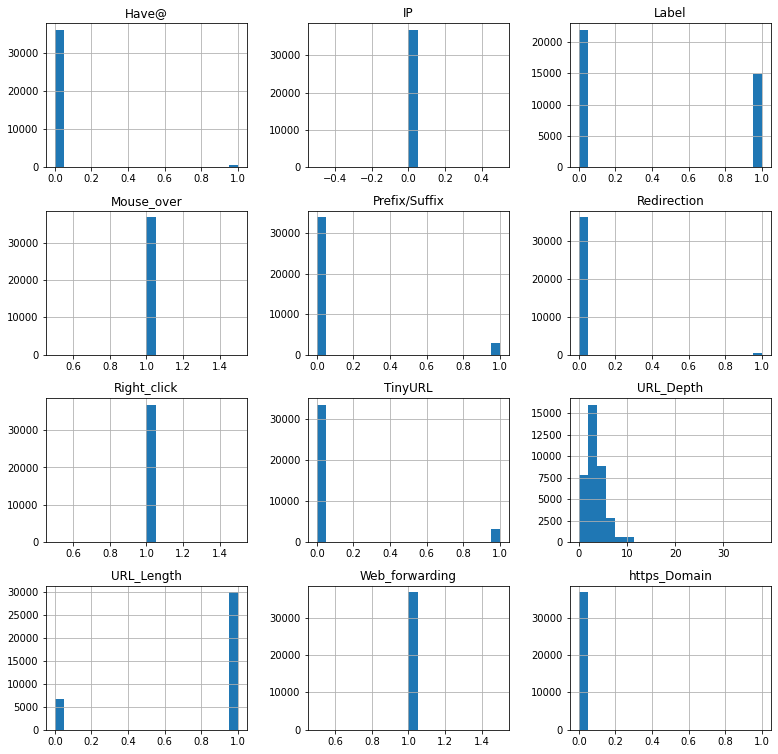

In [13]:
#Plotting the data distribution
urldata.hist(bins = 20,figsize = (13,13))
plt.show()

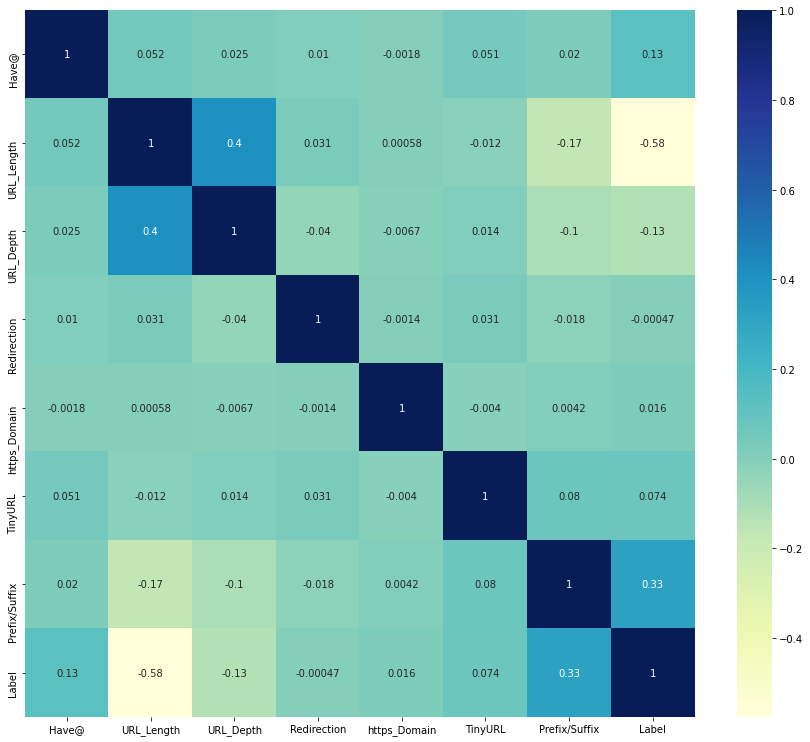

In [14]:
# correlation matrix
# matrix = np.triu(urldata.corr())

temp_df = urldata.drop(['IP','Mouse_over','Web_forwarding', 'Right_click'], axis=1)

plt.figure(figsize=(15,13))
sns.heatmap(temp_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [15]:
urldata.describe().T

,count,mean,std,min,25%,50%,75%,max
IP,36716.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Have@,36716.0,0.020127,0.140438,0.0,0.0,0.0,0.0,1.0
URL_Length,36716.0,0.815802,0.387651,0.0,1.0,1.0,1.0,1.0
URL_Depth,36716.0,3.106302,2.109208,0.0,2.0,3.0,4.0,38.0
Redirection,36716.0,0.012447,0.110871,0.0,0.0,0.0,0.0,1.0
https_Domain,36716.0,0.000163,0.012783,0.0,0.0,0.0,0.0,1.0
TinyURL,36716.0,0.088218,0.283615,0.0,0.0,0.0,0.0,1.0
Prefix/Suffix,36716.0,0.078140,0.268396,0.0,0.0,0.0,0.0,1.0
Mouse_over,36716.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Web_forwarding,36716.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [20]:
urldata.isnull().sum()

Domain            0
IP                0
Have@             0
URL_Length        0
URL_Depth         0
Redirection       0
https_Domain      0
TinyURL           0
Prefix/Suffix     0
Mouse_over        0
Web_forwarding    0
Right_click       0
Label             0
dtype: int64

In [16]:
label_count = pd.DataFrame(urldata.Label.value_counts())

<AxesSubplot:ylabel='Label'>

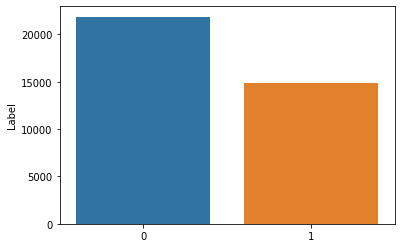

In [17]:
sns.barplot(label_count.index, label_count.Label)

### Shuffling the data in dataset so that when we split data is equally disctributed for training


In [41]:
urldata = urldata.sample(frac=1).reset_index(drop=True)
urldata.head()

,IP,Have@,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,Mouse_over,Web_forwarding,Right_click,Label
0,0,0,1,3,0,0,1,0,1,1,1,0
1,0,0,1,3,0,0,0,0,1,1,1,0
2,0,0,1,3,0,0,0,0,1,1,1,0
3,0,0,1,4,0,0,1,0,1,1,1,0
4,0,0,1,3,0,0,1,0,1,1,1,0


## Splitting the data for training and testing


In [42]:
X = urldata.drop(['Label'], axis=True)
Y = urldata['Label']

In [43]:
X.shape, Y.shape

((36716, 11), (36716,))

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((25701, 11), (11015, 11))

## Machine Learning Model and Training 

In [156]:
from sklearn.metrics import accuracy_score

In [157]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### Model 1: Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [159]:
#predicting the target value from the model for the samples
y_test_log = tree.predict(X_test)
y_train_log = tree.predict(X_train)

#### Performance Evaluation

In [160]:
#computing the accuracy of the model performance
acc_train_log = accuracy_score(Y_train,y_train_log)
acc_test_log = accuracy_score(Y_test,y_test_log)

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_log))



Logistic Regression: Accuracy on training Data: 0.830
Logistic Regression: Accuracy on test Data: 0.832


### Model 2: Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [162]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#### Performance Evaluation

In [163]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(Y_train,y_train_tree)
acc_test_tree = accuracy_score(Y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))


Decision Tree: Accuracy on training Data: 0.830
Decision Tree: Accuracy on test Data: 0.832


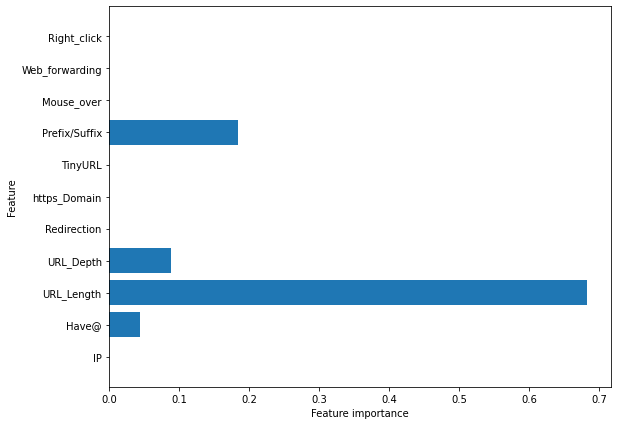

In [164]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### Model 3: Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5)

In [166]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [167]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(Y_train,y_train_forest)
acc_test_forest = accuracy_score(Y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.830
Random forest: Accuracy on test Data: 0.832


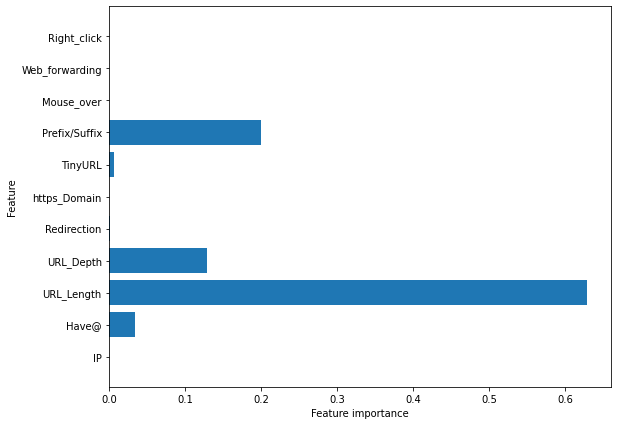

In [168]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### Model 4: MultiLayer Perceptron


In [173]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.005, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, Y_train)

MLPClassifier(alpha=0.005, hidden_layer_sizes=[100, 100, 100])

In [174]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [175]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(Y_train,y_train_mlp)
acc_test_mlp = accuracy_score(Y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))


Multilayer Perceptrons: Accuracy on training Data: 0.840
Multilayer Perceptrons: Accuracy on test Data: 0.841


In [177]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, y_test_mlp )

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.75


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.75')

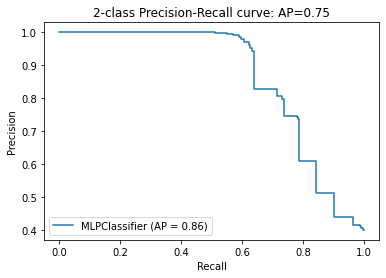

In [178]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(mlp, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Trying to improve the predictive performance with Neural Networks


In [180]:
#Applying neural network using tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [224]:
#Initializing the ANN
ann_classifier = Sequential()

#Adding the input layer and first hidden layer
ann_classifier.add(Dense(units=50, kernel_initializer='uniform', activation='relu', input_dim=11))

# Adding the second hidden layer
ann_classifier.add(Dense(units=30, kernel_initializer = 'uniform', activation = 'relu'))

#Adding the output layer
ann_classifier.add(Dense(units=1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
ann_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [225]:
# Fitting the ANN to the Training set
history = ann_classifier.fit(X_train, Y_train, batch_size = 10, epochs = 100, verbose = 1, validation_data=(X_test, Y_test))

scores = model.evaluate(X_test, Y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))

Train on 25701 samples, validate on 11015 samples
Epoch 1/100
25701/25701 [==============================] - 5s 206us/step - loss: 0.4253 - accuracy: 0.8138 - val_loss: 0.4004 - val_accuracy: 0.8303
Epoch 2/100
25701/25701 [==============================] - 5s 185us/step - loss: 0.4000 - accuracy: 0.8241 - val_loss: 0.3951 - val_accuracy: 0.8308
Epoch 3/100
25701/25701 [==============================] - 5s 188us/step - loss: 0.3941 - accuracy: 0.8269 - val_loss: 0.3897 - val_accuracy: 0.8328
Epoch 4/100
25701/25701 [==============================] - 5s 187us/step - loss: 0.3906 - accuracy: 0.8288 - val_loss: 0.3993 - val_accuracy: 0.8311
Epoch 5/100
25701/25701 [==============================] - 5s 186us/step - loss: 0.3889 - accuracy: 0.8288 - val_loss: 0.3870 - val_accuracy: 0.8330
Epoch 6/100
25701/25701 [==============================] - 5s 188us/step - loss: 0.3882 - accuracy: 0.8290 - val_loss: 0.3892 - val_accuracy: 0.8338
Epoch 7/100
25701/25701 [==============================]

25701/25701 [==============================] - 5s 176us/step - loss: 0.3757 - accuracy: 0.8371 - val_loss: 0.3758 - val_accuracy: 0.8399
Epoch 56/100
25701/25701 [==============================] - 4s 175us/step - loss: 0.3751 - accuracy: 0.8365 - val_loss: 0.3752 - val_accuracy: 0.8417
Epoch 57/100
25701/25701 [==============================] - 5s 176us/step - loss: 0.3756 - accuracy: 0.8376 - val_loss: 0.3765 - val_accuracy: 0.8394
Epoch 58/100
25701/25701 [==============================] - 5s 175us/step - loss: 0.3750 - accuracy: 0.8370 - val_loss: 0.3790 - val_accuracy: 0.8387
Epoch 59/100
25701/25701 [==============================] - 5s 175us/step - loss: 0.3755 - accuracy: 0.8373 - val_loss: 0.3764 - val_accuracy: 0.8365
Epoch 60/100
25701/25701 [==============================] - 5s 184us/step - loss: 0.3756 - accuracy: 0.8373 - val_loss: 0.3759 - val_accuracy: 0.8415
Epoch 61/100
25701/25701 [==============================] - 4s 175us/step - loss: 0.3745 - accuracy: 0.8377 - val

In [221]:
print(history.history.keys())


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


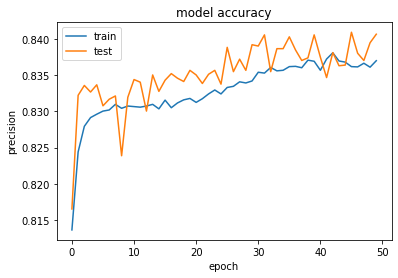

In [222]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

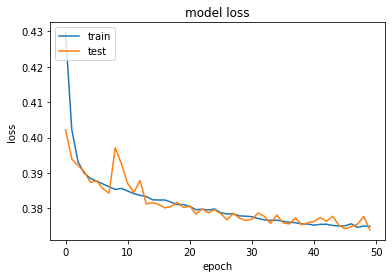

In [223]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()